In [43]:
def keep_numbers(data):
    where = data.dtypes != 'object'
    cols = where.loc[where].index
    return data[cols]

In [44]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data = pd.read_csv('flavors_of_cacao.csv')
%matplotlib inline

data.head(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [45]:
data.columns = ['Company','Brand','First_Production_Date','Review_Date','%Cocoa','Location','Rating','Type','Bean_Origin']

In [46]:
data['Type'].iloc[0:10]

0           
1           
2           
3           
4           
5    Criollo
6           
7    Criollo
8    Criollo
9           
Name: Type, dtype: object

In [47]:
data['Type'].iloc[0]

'\xa0'

In [48]:
data = data.replace('\xa0',np.nan)

In [49]:
data['Name'] = data['Company']+' '+data['Brand']

In [50]:
data.head(1)

,Company,Brand,First_Production_Date,Review_Date,%Cocoa,Location,Rating,Type,Bean_Origin,Name
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome,A. Morin Agua Grande


In [51]:
data['%Cocoa'] = data['%Cocoa'].str.replace('%','').astype('float')

In [52]:
data['Location'].value_counts()[0:10]

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: Location, dtype: int64

In [53]:
data['Rating'].groupby(pd.cut(data['Rating'],5)).count()

Rating
(0.996, 1.8]     17
(1.8, 2.6]      173
(2.6, 3.4]      903
(3.4, 4.2]      700
(4.2, 5.0]        2
Name: Rating, dtype: int64

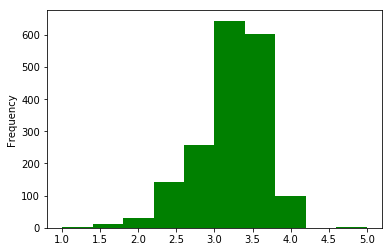

In [54]:
data['Rating'].plot.hist(color = 'g')
plt.show()

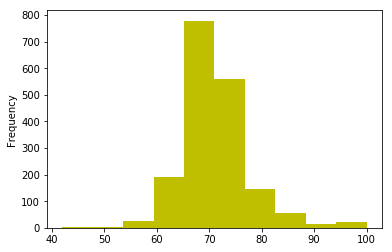

In [55]:
data['%Cocoa'].plot.hist(color = 'y')
plt.show()

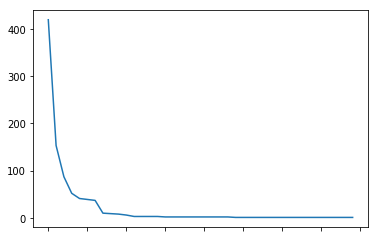

In [56]:
data['Type'].value_counts().plot.line()
plt.show()

In [57]:
data['Bean_Origin'].value_counts().iloc[0:10]

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Name: Bean_Origin, dtype: int64

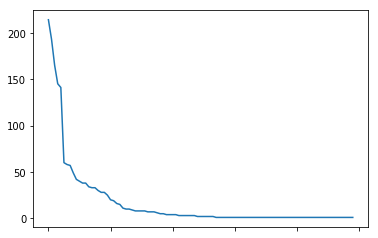

In [58]:
data['Bean_Origin'].value_counts().plot.line()
plt.show()

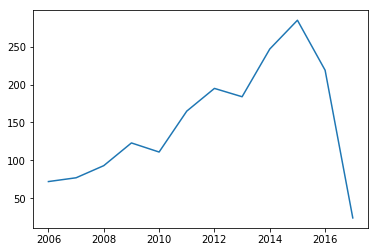

In [59]:
production_date = pd.DataFrame(data['Review_Date'].value_counts()).reset_index()
production_date.sort_values(by = 'index', inplace = True)
plt.plot(production_date['index'],production_date['Review_Date'].tolist())
plt.show()

In [60]:
pd.get_dummies(data['Location']).iloc[0:1]

,Amsterdam,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,...,Spain,St. Lucia,Suriname,Sweden,Switzerland,U.K.,U.S.A.,Venezuela,Vietnam,Wales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
pd.get_dummies(data['Type']).iloc[0:1]

,Amazon,Amazon mix,"Amazon, ICS",Beniano,Blend,"Blend-Forastero,Criollo",CCN51,Criollo,Criollo (Amarru),Criollo (Ocumare 61),...,Nacional,Nacional (Arriba),Trinitario,Trinitario (85% Criollo),Trinitario (Amelonado),Trinitario (Scavina),"Trinitario, Criollo","Trinitario, Forastero","Trinitario, Nacional","Trinitario, TCGA"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
pd.get_dummies(data['Bean_Origin']).iloc[0:1]

,"Africa, Carribean, C. Am.",Australia,Belize,Bolivia,Brazil,Burma,Cameroon,Carribean,Carribean(DR/Jam/Tri),Central and S. America,...,"Venez,Africa,Brasil,Peru,Mex",Venezuela,"Venezuela, Carribean","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Venezuela/ Ghana,Vietnam,West Africa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Type = pd.get_dummies(data['Type'])
Type.columns = [x+' (Type)' for x in Type.columns]

Bean_Origin = pd.get_dummies(data['Bean_Origin'])
Bean_Origin.columns = [x+' (Bean_Origin)' for x in Bean_Origin.columns]

data = pd.concat([data,Type,Bean_Origin],1)

In [64]:
y = data.pop('Rating')

In [65]:
y.iloc[0:5]

0    3.75
1    2.75
2    3.00
3    3.50
4    3.50
Name: Rating, dtype: float64

In [66]:
name = data.pop('Name')

In [67]:
data = keep_numbers(data)
data = data[data.columns[2:]]

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data)
X = pca.transform(data)

In [69]:
X[0:10]

array([[ 8.69871594, -0.19392614],
       [ 1.69882146, -0.18605489],
       [ 1.69882146, -0.18605489],
       [ 1.69882146, -0.18605489],
       [ 1.70105944, -0.34399242],
       [ 1.6969603 , -0.29118596],
       [ 1.69831378, -0.17820458],
       [ 1.6969603 , -0.29118596],
       [ 1.6969603 , -0.29118596],
       [ 1.70105944, -0.34399242]])

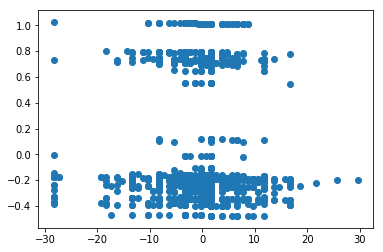

In [70]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [71]:
bad = y < 2

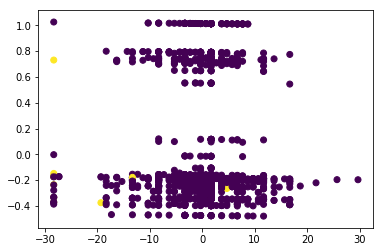

In [72]:
plt.scatter(X[:,0], X[:,1], c = bad)
plt.show()

In [73]:
y.mean(),y.median(),y.max()

(3.185933147632312, 3.25, 5.0)

In [74]:
good = y > 3.25

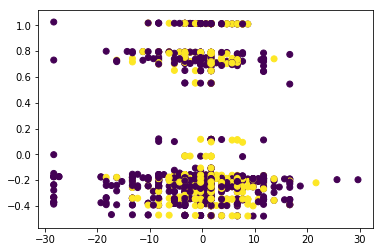

In [75]:
plt.scatter(X[:,0], X[:,1], c = good)
plt.show()

In [109]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(2)
clustering.fit(data)
labels = clustering.labels_

In [110]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

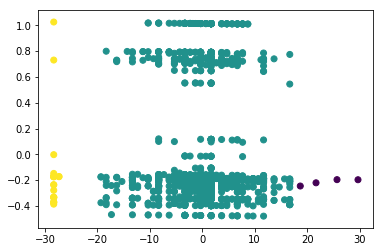

In [111]:
plt.scatter(*X.T, c = labels)
plt.show()

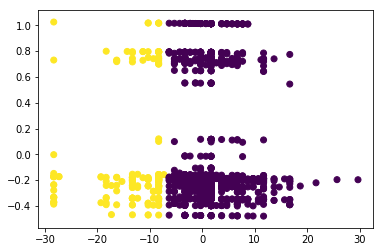

In [113]:
from sklearn.cluster import Birch
clustering = Birch(n_clusters = 2)
clustering.fit(data)
labels = clustering.labels_

plt.scatter(*X.T, c = labels)
plt.show()

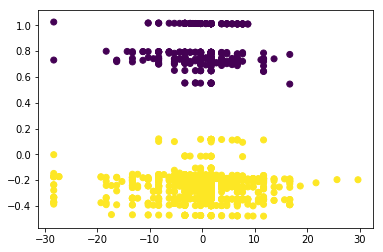

In [125]:
from sklearn.mixture import GaussianMixture
clustering = GaussianMixture(n_components = 2)
clustering.fit(X)
labels = clustering.predict(X)

plt.scatter(*X.T, c = labels)
plt.show()

In [134]:
y.loc[np.where(labels == 0)].describe()

count    419.000000
mean       3.245823
std        0.421265
min        1.750000
25%        3.000000
50%        3.250000
75%        3.500000
max        5.000000
Name: Rating, dtype: float64

In [135]:
y.loc[np.where(labels == 1)].describe()

count    1376.000000
mean        3.167696
std         0.492760
min         1.000000
25%         2.750000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [142]:
good = X[np.where(labels == 0)]
y_good = y.loc[np.where(labels == 0)]

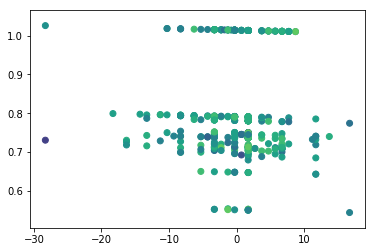

In [165]:
plt.scatter( *good.T , c = y_good, vmin = y.min(), vmax = y.max())

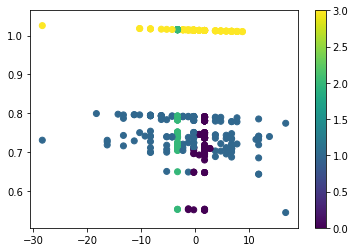

In [218]:
from sklearn.mixture import GaussianMixture
N = 4
clustering2 = GaussianMixture(n_components = N)
clustering2.fit(good)
labels = clustering2.predict(good)

plt.scatter(*good.T, c = labels)
plt.colorbar()
plt.show()

In [219]:
for x in range(N):
    print(y_good.iloc[np.where(labels == x)].describe())

count    129.000000
mean       3.313953
std        0.469041
min        2.000000
25%        3.000000
50%        3.500000
75%        3.500000
max        5.000000
Name: Rating, dtype: float64
count    138.000000
mean       3.181159
std        0.379406
min        1.750000
25%        3.000000
50%        3.250000
75%        3.500000
max        4.000000
Name: Rating, dtype: float64
count    56.000000
mean      3.250000
std       0.407319
min       2.500000
25%       3.000000
50%       3.250000
75%       3.500000
max       4.000000
Name: Rating, dtype: float64
count    96.000000
mean      3.244792
std       0.410358
min       2.250000
25%       3.000000
50%       3.250000
75%       3.500000
max       4.000000
Name: Rating, dtype: float64


In [223]:
inversed = pca.inverse_transform(X[np.where(labels == 0)])

In [234]:
np.abs(pd.DataFrame(pca.components_[0])).sort_values(by = 0, ascending = False).iloc[0:10]

,0
0,0.999981
62,0.004329
96,0.002309
43,0.001197
131,0.001119
86,0.001024
77,0.001012
138,0.000969
26,0.000958
51,0.000808


In [245]:
want = np.abs(pd.DataFrame(pca.components_[0])).sort_values(by = 0, ascending = False).iloc[0:4].index

In [246]:
pd.DataFrame(inversed)[want].head(10)

,0,62,96,43
0,62.999696,0.101217,0.142922,0.001690
1,69.999547,0.130568,0.125821,0.010527
2,69.999070,0.133748,0.128959,0.008984
3,69.998724,0.130264,0.125526,0.010672
4,70.001285,-0.018939,-0.021608,0.083014
5,69.997158,0.155770,0.150686,-0.001699
6,69.997158,0.155770,0.150686,-0.001699
7,62.997420,0.125940,0.167315,-0.010303
8,69.999522,0.135309,0.130496,0.008228
9,69.997158,0.155770,0.150686,-0.001699


In [247]:
data.columns[want]

Index(['%Cocoa', 'Ecuador (Bean_Origin)', 'Peru (Bean_Origin)',
       'Belize (Bean_Origin)'],
      dtype='object')

In [248]:
good = pd.DataFrame(inversed)[want]
good.columns = data.columns[want].tolist()
good.describe()

,%Cocoa,Ecuador (Bean_Origin),Peru (Bean_Origin),Belize (Bean_Origin)
count,129.000000,129.000000,129.000000,129.000000
mean,71.651229,0.097986,0.082830,0.031766
std,5.917083,0.079893,0.081080,0.039975
min,55.005085,-0.084916,-0.094146,-0.023233
25%,69.999070,0.014418,-0.012522,0.003810
50%,70.003795,0.132532,0.119512,0.013812
75%,74.999304,0.155705,0.139946,0.078546
max,90.003045,0.241391,0.192616,0.119413


In [260]:
select = (69.9 < data['%Cocoa']) & (data['%Cocoa'] < 72) & (data['Ecuador (Bean_Origin)'] < 0.16) & (data['Peru (Bean_Origin)'] < 0.14) & (data['Belize (Bean_Origin)'] < 0.08)

y.loc[data.loc[select].index].describe()

count    540.000000
mean       3.278241
std        0.441382
min        1.000000
25%        3.000000
50%        3.250000
75%        3.500000
max        5.000000
Name: Rating, dtype: float64

In [262]:
y.loc[data.loc[~select].index].describe()

count    1255.000000
mean        3.146215
std         0.487826
min         1.000000
25%         2.750000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64